# Effects of Borrower features on Loan Status
#### Submitted By: Bharati Malik

## Introduction


> This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> The goal of this data analysis project is to understand the factors that are related to loans that were charged-off or defaulted. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv('FeaturedDataset.csv')
df.head()



,ListingCreationDate,Term,LoanStatus,BorrowerAPR,EmploymentStatus,IsBorrowerHomeowner,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Closed_Open,ListingCategory
0,2007-08-26 19:09:29.263,36,Completed,0.16516,Self-employed,True,1,0.17,True,3083.333333,9425,330.43,Closed,Not Available
1,2014-02-27 08:28:07.900,36,Current,0.12016,Employed,False,13,0.18,True,6125.000000,10000,318.93,Open,Home Improvement
2,2007-01-05 15:00:47.090,36,Completed,0.28269,Not available,False,0,0.06,True,2083.333333,3001,123.32,Closed,Not Available
3,2012-10-22 11:02:35.010,36,Current,0.12528,Employed,True,7,0.15,True,2875.000000,10000,321.45,Open,Motorcycle
4,2013-09-14 18:38:39.097,36,Current,0.24614,Employed,True,6,0.26,True,9583.333333,15000,563.97,Open,Home Improvement


In [3]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio','OpenRevolvingAccounts']
cat_vars = ['LoanStatus', 'EmploymentStatus', 'Term']

In [4]:
# Let me group all Past Due loans under a unique name: 'Past Due' in order to consolidate the numbers
df['LoanStatus'] = df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

## Loan Status Distribution

> Please scroll to the sub-slide and you will see that approximately 54% of our loans are either current or defaulted

> One good news is that only about 2% of loans were past due, meaning that very few times did the customer missed onto the payment

,LoanStatus,Percentage of Loans
LoanStatus,,
Current,56576,49.666409
Completed,38049,33.402100
Chargedoff,11992,10.527425
Defaulted,5018,4.405155
Past Due,2067,1.814559
FinalPaymentInProgress,205,0.179963
Cancelled,5,0.004389


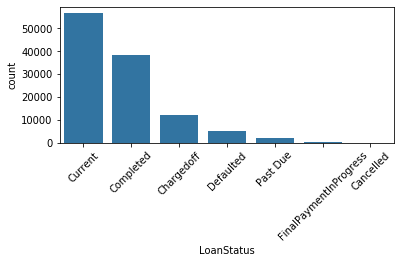

In [5]:
# Define figure size
plt.figure(figsize = [6, 2.5])

# Visualizing the dependent variable which is the key variable of interest
base_color = sb.color_palette()[0]
cat_order = df['LoanStatus'].value_counts().index
sb.countplot(data = df, x = 'LoanStatus', color = base_color, order = cat_order)
plt.xticks(rotation = 45);


# Percentage of loans in each status in the decreasing order
PercentByStatus = pd.DataFrame(df.groupby('LoanStatus')['LoanStatus'].count())
PercentByStatus['Percentage of Loans'] = (PercentByStatus['LoanStatus']/PercentByStatus['LoanStatus'].sum())*100
PercentByStatus.sort_values(by='Percentage of Loans', ascending=False)


## Number of Loans based on Listing Categories

> Please scroll to the sub-slide and we can see that debt consolidation is the most popular type of listing/loan at Prosper. What we may want to know is if there is a particular listing with high number of charged-off or defaulted loans.

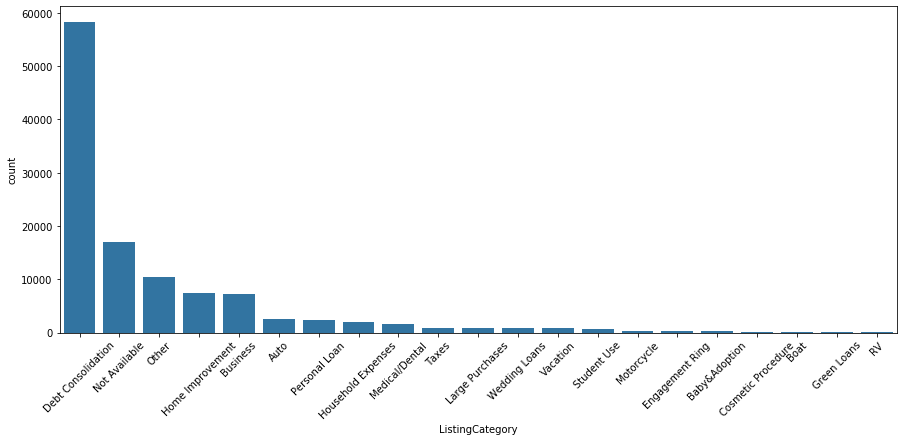

In [6]:
# Distribution of Listing Category

plt.figure(figsize=[15, 6])
base_color = sb.color_palette()[0]
cat_order = df['ListingCategory'].value_counts().index
sb.countplot(data = df, x = 'ListingCategory', color = base_color, order = cat_order)
plt.xticks(rotation = 45);

## Number of Loans based on Listing Categories

> Please scroll to the sub-slide and we can see that most of the current loans are for 36-month term and taken by employed customers. 

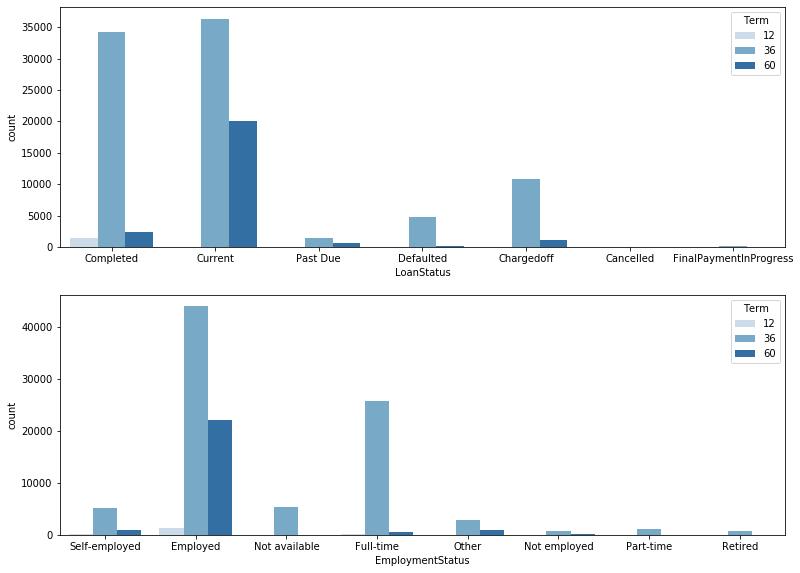

In [7]:
plt.figure(figsize = [13, 15])

# subplot 1: Loan Status vs term
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette = 'Blues')


# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');

## Further Analysis about Current Loans

> Please scroll to the sub-slide and it appears that there isn't a significant difference between loan status and Open Revolving Accounts. However, 'current' loans have a slight higher median for `OpenRevolvingAccounts` than others status.

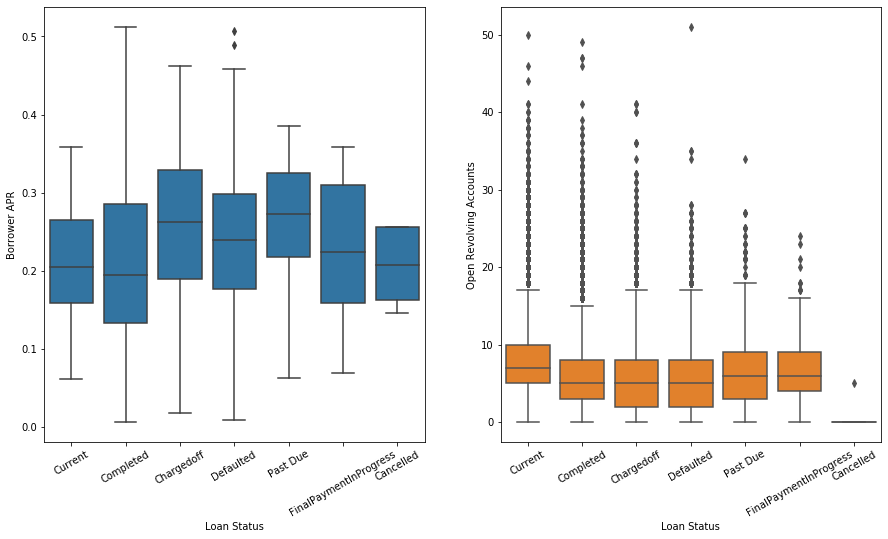

In [8]:
# Order the categorical variable LoanStatus
cat_order = df['LoanStatus'].value_counts().index

# Define figure size
plt.figure(figsize = [15, 8])

# LoanStatus vs BorrowerAPR on the left
default_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data=df, x='LoanStatus', y='BorrowerAPR', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')
plt.xticks(rotation=30);

# LoanStatus vs OpenRevolvingAccounts on the right
default_color = sb.color_palette()[1]
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=df, x='LoanStatus', y='OpenRevolvingAccounts', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Open Revolving Accounts')
plt.xticks(rotation=30);

## Loan Status vs. Original Loan Amount

> Please scroll to the sub-slide  and you will notice that current loans have a higher original loan amount than the other statuses. Here, I would recommend further investigation alongside Prosper's business analysts to understand if people are getting higher loans or this phenomenon is due to external factors, such as macro-economic ones.

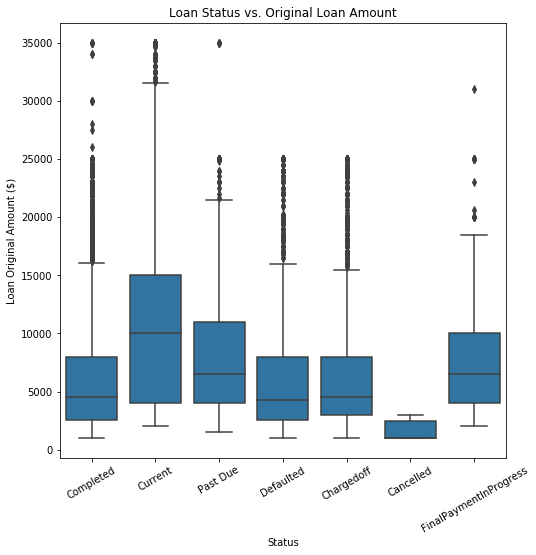

In [9]:
# LoanStatus vs LoanOriginalAmount
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]

ax2 = sb.boxplot(data=df, x='LoanStatus', y='LoanOriginalAmount', color = default_color)
plt.title('Loan Status vs. Original Loan Amount')
plt.xlabel('Status')
plt.ylabel('Loan Original Amount ($)')
plt.xticks(rotation=30)
plt.show()

## Thank you!